In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [2]:
url_client_prof = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_demo.txt'

url_dig_fprint_1 = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt'

url_dig_fprint_2 = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt'

url_exp_rost = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt'


In [9]:
client_prof = pd.read_csv(url_client_prof)


In [4]:
digital_fprint_1 = pd.read_csv(url_dig_fprint_1)
digital_fprint_2 = pd.read_csv(url_dig_fprint_2)

In [5]:
digital_fprint = pd.concat([digital_fprint_1, digital_fprint_2], axis = 0)

In [10]:
experiment_roster = pd.read_csv(url_exp_rost)


In [60]:
client_prof

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [53]:
# checking for nULL values - no null values found !!!
client_prof.isnull()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
70604,False,False,False,False,False,False,False,False,False
70605,False,False,False,False,False,False,False,False,False
70606,False,False,False,False,False,False,False,False,False
70607,False,False,False,False,False,False,False,False,False


In [54]:
# cheking for duplicates - no duplicates found!!!
client_prof.duplicated().sum()

0

In [ ]:
# checking dattype of each column
client_prof.dtypes

In [22]:
client_prof['logons_6_mnth'].value_counts()

logons_6_mnth
9.0    12350
3.0    10243
4.0    10220
7.0     9893
5.0     9254
6.0     7878
8.0     4810
2.0     3009
1.0     2938
Name: count, dtype: int64

In [23]:
client_prof['calls_6_mnth'].value_counts()

calls_6_mnth
6.0    14112
1.0    11016
2.0    10252
3.0     8752
0.0     7732
4.0     7175
5.0     6627
7.0     4929
Name: count, dtype: int64

In [27]:
client_prof['clnt_tenure_yr'].value_counts()

clnt_tenure_yr
6.0     7092
5.0     6955
7.0     4955
4.0     4687
15.0    4564
8.0     4045
14.0    3646
12.0    3631
13.0    3607
9.0     3357
11.0    2920
10.0    2775
16.0    2714
21.0    2257
20.0    1580
22.0    1492
17.0    1373
23.0    1279
18.0    1206
19.0    1153
24.0     846
26.0     660
27.0     632
28.0     507
25.0     484
3.0      449
29.0     309
30.0     303
33.0     206
32.0     191
34.0     175
31.0     166
35.0     102
2.0       81
36.0      36
37.0      35
38.0      33
48.0      16
39.0       9
40.0       9
55.0       9
50.0       8
47.0       6
43.0       6
42.0       6
46.0       5
51.0       5
49.0       4
44.0       3
52.0       2
54.0       1
41.0       1
45.0       1
62.0       1
Name: count, dtype: int64

In [28]:
logons_groups = client_prof.groupby(['gendr','logons_6_mnth', 'clnt_age']).agg({'bal':'mean'})
logons_groups

bal
gendr logons_6_mnth clnt_age            
F     1.0           14.0       16989.140
                    14.5       18216.980
                    15.5       17874.980
                    16.0       41844.935
                    16.5       31916.515
...                                  ...
U     9.0           88.5      665709.940
                    93.0       30461.890
X     4.0           26.0       25380.340
      5.0           52.0       25710.630
      9.0           40.0       31437.350

[3751 rows x 1 columns]

In [29]:
logon_tables = {}
for logon in client_prof['logons_6_mnth'].unique():
    logon_tables[logon] = client_prof[client_prof['logons_6_mnth'] ==logon]

In [35]:
logon_group_9 = logon_tables[9]
logon_group_9

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0
11,2537139,8.0,99.0,51.5,U,2.0,135940.68,6.0,9.0
...,...,...,...,...,...,...,...,...,...
50485,3823121,14.0,178.0,68.5,F,2.0,32666.22,6.0,9.0
50489,6751438,8.0,98.0,49.5,U,2.0,416988.75,6.0,9.0
50493,9932367,23.0,280.0,57.0,F,2.0,94466.55,6.0,9.0
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0


In [36]:
logon_group_9.groupby(['gendr', 'num_accts', 'clnt_age', 'clnt_tenure_yr']).agg({'bal':'mean'})

bal
gendr num_accts clnt_age clnt_tenure_yr            
F     2.0       17.5     20.0              39631.34
                18.0     19.0              34306.90
                18.5     22.0              35353.64
                20.5     4.0               38009.86
                         21.0              76762.21
...                                             ...
U     5.0       52.0     6.0              191380.40
                52.5     6.0              451736.42
                58.0     6.0              209407.31
                61.0     20.0            3450821.16
X     2.0       40.0     11.0              31437.35

[6816 rows x 1 columns]

In [39]:
logon_group_9.groupby(['gendr', 'clnt_tenure_yr']).agg({'clnt_age':'mean'})

clnt_age
gendr clnt_tenure_yr           
F     2.0             43.750000
      3.0             54.045455
      4.0             50.401515
      5.0             48.933594
      6.0             51.238095
...                         ...
U     33.0            67.500000
      34.0            71.500000
      35.0            56.750000
      42.0            63.000000
X     11.0            40.000000

[120 rows x 1 columns]

In [46]:
pivot_table =  logon_group_9.pivot_table(index = ['gendr'],
                                         columns = 'clnt_tenure_yr',
                                         values = 'clnt_age',
                                         aggfunc = 'mean')

pivot_table.round(decimals=2)

clnt_tenure_yr,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...,40.0,41.0,42.0,43.0,46.0,48.0,49.0,50.0,52.0,55.0
gendr,,,,,,,,,,,,,,,,,,,,,
F,43.75,54.05,50.40,48.93,51.24,46.94,47.41,47.66,48.02,46.17,...,NaN,78.0,NaN,NaN,NaN,70.0,NaN,70.0,62.0,NaN
M,50.00,52.77,46.12,45.66,46.69,39.97,44.40,45.42,45.48,44.16,...,67.0,NaN,NaN,33.5,73.5,42.5,68.0,NaN,NaN,45.0
U,36.45,44.02,37.06,38.64,40.36,43.68,44.69,44.13,37.64,41.47,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
logon_group_9['num_accts'].value_counts()

num_accts
2.0    8121
3.0    3346
4.0     754
5.0     114
6.0      12
7.0       3
Name: count, dtype: int64

In [ ]:
float_columns = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'bal', 'clnt_age']  
logon_group_9[float_columns] =logon_group_9[float_columns].round(2)

In [47]:
logon_group_9['clnt_age'].describe()

count    12350.000000
mean        47.491134
std         16.152274
min         17.500000
25%         32.500000
50%         48.000000
75%         61.000000
max         96.000000
Name: clnt_age, dtype: float64

In [48]:
logon_group_9['clnt_tenure_yr'].describe()

count    12350.000000
mean        12.344211
std          7.253581
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         55.000000
Name: clnt_tenure_yr, dtype: float64

In [50]:
mode = logon_group_9['clnt_tenure_yr'].mode()[0]
med = logon_group_9['clnt_tenure_yr'].median()
mean = logon_group_9['clnt_tenure_yr'].mean()

print(mode)
print(med)
print(mean)

6.0
11.0
12.34421052631579


In [51]:
variance_yr = logon_group_9['clnt_tenure_yr'].var()
std_dev_yr = logon_group_9['clnt_tenure_yr'].std()
min_yr = logon_group_9['clnt_tenure_yr'].min()
max_yr = logon_group_9['clnt_tenure_yr'].max()
range_yr = max_yr - min_yr
q_yr = logon_group_9['clnt_tenure_yr'].quantile([0.25, 0.5, 0.75])

print(variance_yr)
print(std_dev_yr)
print(range_yr)
print(q_yr)

52.61444336000003
7.253581416100603
53.0
0.25     6.0
0.50    11.0
0.75    16.0
Name: clnt_tenure_yr, dtype: float64


<Axes: ylabel='clnt_tenure_yr'>

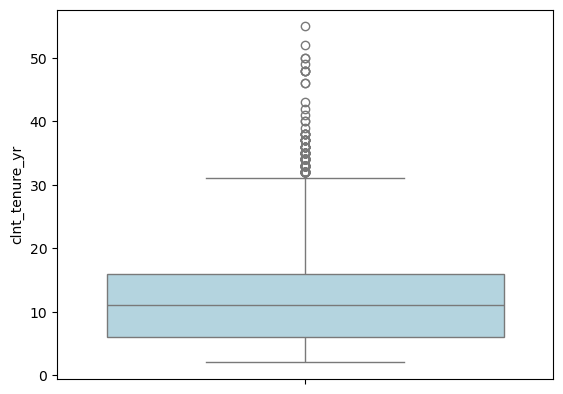

In [52]:
sns.boxplot(data = logon_group_9['clnt_tenure_yr'], color="lightblue")

In [55]:
top_logon_threshold = client_prof['logons_6_mnth'].quantile(0.75)  # Example: Top 25% logon frequency
primary_clients = client_prof[client_prof['logons_6_mnth'] >= top_logon_threshold]

In [59]:
primary_clients

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0
11,2537139,8.0,99.0,51.5,U,2.0,135940.68,6.0,9.0
...,...,...,...,...,...,...,...,...,...
70575,8650568,11.0,135.0,26.0,M,3.0,81293.54,7.0,7.0
70577,4324637,9.0,108.0,37.0,M,2.0,60768.46,7.0,7.0
70581,2184810,23.0,286.0,75.5,M,4.0,2496314.67,7.0,7.0
70586,8057076,10.0,120.0,24.5,F,2.0,68218.85,7.0,7.0


In [58]:
logon_group_9

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0
11,2537139,8.0,99.0,51.5,U,2.0,135940.68,6.0,9.0
...,...,...,...,...,...,...,...,...,...
50485,3823121,14.0,178.0,68.5,F,2.0,32666.22,6.0,9.0
50489,6751438,8.0,98.0,49.5,U,2.0,416988.75,6.0,9.0
50493,9932367,23.0,280.0,57.0,F,2.0,94466.55,6.0,9.0
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0


In [ ]:
top_logon_threshold = client_prof['logons_6_mnth'].quantile(0.25)  # Example: Top 75% logon frequency
primary_clients = client_prof[client_prof['logons_6_mnth'] >= top_logon_threshold]

In [62]:
primary_clients

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0
...,...,...,...,...,...,...,...,...,...
70603,2489338,5.0,66.0,17.5,U,2.0,17869.95,4.0,4.0
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0
